In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
import torch

# Read your CSV file
yelp_data = pd.read_csv('final_df_3040_labels.csv')

# Define aspects and aspect_labels
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)
# Instantiate BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode labels
label_encoder = LabelEncoder()
yelp_data['aspect_label'] = label_encoder.fit_transform(yelp_data['Food Quality'])


# Tokenize and encode the text data
encoded_data = tokenizer(yelp_data['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Create PyTorch DataLoader
dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'], torch.tensor(yelp_data['aspect_label'].values))
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Assuming you have CUDA available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5  # You can adjust this
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Loss: {average_loss}")

# Evaluation
model.eval()
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())

# Decode predictions to original labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Decode true labels to original labels
true_labels = label_encoder.inverse_transform(yelp_data['aspect_label'].values[test_dataset.indices])

# Calculate metrics
classification_rep = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"\nClassification Report:\n{classification_rep}")
print(f"Accuracy: {accuracy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Average Loss: 0.7189129896841221
Epoch 2/5 - Average Loss: 0.5433106994186031
Epoch 3/5 - Average Loss: 0.39105054485032026
Epoch 4/5 - Average Loss: 0.2679235708818745
Epoch 5/5 - Average Loss: 0.16235874236174455

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.70      0.49      0.57       101
         0.0       0.35      0.46      0.40        84
         1.0       0.87      0.88      0.87       424

    accuracy                           0.76       609
   macro avg       0.64      0.61      0.62       609
weighted avg       0.77      0.76      0.76       609

Accuracy: 0.7569786535303776


In [3]:
output_food_label = {
    "classification_report": classification_rep,
    "accuracy": accuracy
}

# Print or use the 'output' variable as needed
print(output_food_label)


{'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.70      0.49      0.57       101\n         0.0       0.35      0.46      0.40        84\n         1.0       0.87      0.88      0.87       424\n\n    accuracy                           0.76       609\n   macro avg       0.64      0.61      0.62       609\nweighted avg       0.77      0.76      0.76       609\n', 'accuracy': 0.7569786535303776}


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
import torch

# Read your CSV file
yelp_data = pd.read_csv('final_df_3040_labels.csv')

# Define aspects and aspect_labels
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)
# Instantiate BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode labels
label_encoder = LabelEncoder()
yelp_data['aspect_label'] = label_encoder.fit_transform(yelp_data['Customer Service'])


# Tokenize and encode the text data
encoded_data = tokenizer(yelp_data['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Create PyTorch DataLoader
dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'], torch.tensor(yelp_data['aspect_label'].values))
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Assuming you have CUDA available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5  # You can adjust this
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Loss: {average_loss}")

# Evaluation
model.eval()
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())

# Decode predictions to original labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Decode true labels to original labels
true_labels = label_encoder.inverse_transform(yelp_data['aspect_label'].values[test_dataset.indices])

# Calculate metrics
classification_rep = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"\nClassification Report:\n{classification_rep}")
print(f"Accuracy: {accuracy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Average Loss: 0.7924425011540477
Epoch 2/5 - Average Loss: 0.6165732506705427
Epoch 3/5 - Average Loss: 0.48406659847214106
Epoch 4/5 - Average Loss: 0.33612283841326024
Epoch 5/5 - Average Loss: 0.18132686760346903

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.72      0.58      0.64        92
         0.0       0.74      0.69      0.72       264
         1.0       0.71      0.81      0.75       253

    accuracy                           0.72       609
   macro avg       0.72      0.69      0.70       609
weighted avg       0.72      0.72      0.72       609

Accuracy: 0.722495894909688


In [5]:
output_service_label = {
    "classification_report": classification_rep,
    "accuracy": accuracy
}

# Print or use the 'output' variable as needed
print(output_service_label)

{'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.72      0.58      0.64        92\n         0.0       0.74      0.69      0.72       264\n         1.0       0.71      0.81      0.75       253\n\n    accuracy                           0.72       609\n   macro avg       0.72      0.69      0.70       609\nweighted avg       0.72      0.72      0.72       609\n', 'accuracy': 0.722495894909688}


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
import torch

# Read your CSV file
yelp_data = pd.read_csv('final_df_3040_labels.csv')

# Define aspects and aspect_labels
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)
# Instantiate BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode labels
label_encoder = LabelEncoder()
yelp_data['aspect_label'] = label_encoder.fit_transform(yelp_data['Place'])


# Tokenize and encode the text data
encoded_data = tokenizer(yelp_data['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Create PyTorch DataLoader
dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'], torch.tensor(yelp_data['aspect_label'].values))
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Assuming you have CUDA available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5  # You can adjust this
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Loss: {average_loss}")

# Evaluation
model.eval()
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())

# Decode predictions to original labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Decode true labels to original labels
true_labels = label_encoder.inverse_transform(yelp_data['aspect_label'].values[test_dataset.indices])

# Calculate metrics
classification_rep = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"\nClassification Report:\n{classification_rep}")
print(f"Accuracy: {accuracy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Average Loss: 0.7351784642742968
Epoch 2/5 - Average Loss: 0.5685245954784853
Epoch 3/5 - Average Loss: 0.4035131071918997
Epoch 4/5 - Average Loss: 0.24114387639001478
Epoch 5/5 - Average Loss: 0.13090980647296963

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.31      0.43      0.36        30
         0.0       0.84      0.75      0.79       417
         1.0       0.55      0.66      0.60       162

    accuracy                           0.71       609
   macro avg       0.57      0.61      0.58       609
weighted avg       0.74      0.71      0.72       609

Accuracy: 0.7110016420361248


In [7]:
output_place_label = {
    "classification_report": classification_rep,
    "accuracy": accuracy
}

# Print or use the 'output' variable as needed
print(output_place_label)

{'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.31      0.43      0.36        30\n         0.0       0.84      0.75      0.79       417\n         1.0       0.55      0.66      0.60       162\n\n    accuracy                           0.71       609\n   macro avg       0.57      0.61      0.58       609\nweighted avg       0.74      0.71      0.72       609\n', 'accuracy': 0.7110016420361248}


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
import torch

# Read your CSV file
yelp_data = pd.read_csv('final_df_3040_labels.csv')

# Define aspects and aspect_labels
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)
# Instantiate BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode labels
label_encoder = LabelEncoder()
yelp_data['aspect_label'] = label_encoder.fit_transform(yelp_data['Menu_and_Pricing'])


# Tokenize and encode the text data
encoded_data = tokenizer(yelp_data['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Create PyTorch DataLoader
dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'], torch.tensor(yelp_data['aspect_label'].values))
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Assuming you have CUDA available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5  # You can adjust this
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Loss: {average_loss}")

# Evaluation
model.eval()
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())

# Decode predictions to original labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Decode true labels to original labels
true_labels = label_encoder.inverse_transform(yelp_data['aspect_label'].values[test_dataset.indices])

# Calculate metrics
classification_rep = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"\nClassification Report:\n{classification_rep}")
print(f"Accuracy: {accuracy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Average Loss: 0.7622175593485777
Epoch 2/5 - Average Loss: 0.6234079110137934
Epoch 3/5 - Average Loss: 0.48988270671496836
Epoch 4/5 - Average Loss: 0.2843735671765821
Epoch 5/5 - Average Loss: 0.13174210789755647

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.46      0.33      0.39        57
         0.0       0.79      0.88      0.83       433
         1.0       0.46      0.33      0.38       119

    accuracy                           0.72       609
   macro avg       0.57      0.51      0.53       609
weighted avg       0.69      0.72      0.70       609

Accuracy: 0.7208538587848933


In [9]:
output_menu_label = {
    "classification_report": classification_rep,
    "accuracy": accuracy
}

# Print or use the 'output' variable as needed
print(output_menu_label)

{'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.46      0.33      0.39        57\n         0.0       0.79      0.88      0.83       433\n         1.0       0.46      0.33      0.38       119\n\n    accuracy                           0.72       609\n   macro avg       0.57      0.51      0.53       609\nweighted avg       0.69      0.72      0.70       609\n', 'accuracy': 0.7208538587848933}


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
import torch

# Read your CSV file
yelp_data = pd.read_csv('final_df_3040_labels.csv')

# Define aspects and aspect_labels
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)
# Instantiate BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode labels
label_encoder = LabelEncoder()
yelp_data['aspect_label'] = label_encoder.fit_transform(yelp_data['Drinks'])


# Tokenize and encode the text data
encoded_data = tokenizer(yelp_data['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Create PyTorch DataLoader
dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'], torch.tensor(yelp_data['aspect_label'].values))
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Assuming you have CUDA available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5  # You can adjust this
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Loss: {average_loss}")

# Evaluation
model.eval()
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())

# Decode predictions to original labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Decode true labels to original labels
true_labels = label_encoder.inverse_transform(yelp_data['aspect_label'].values[test_dataset.indices])

# Calculate metrics
classification_rep = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"\nClassification Report:\n{classification_rep}")
print(f"Accuracy: {accuracy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Average Loss: 0.5527456403451502
Epoch 2/5 - Average Loss: 0.45584591126684193
Epoch 3/5 - Average Loss: 0.35790968711269266
Epoch 4/5 - Average Loss: 0.23602244390284854
Epoch 5/5 - Average Loss: 0.12119005875427227

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.11      0.15      0.12        13
         0.0       0.87      0.91      0.89       490
         1.0       0.55      0.40      0.46       106

    accuracy                           0.81       609
   macro avg       0.51      0.49      0.49       609
weighted avg       0.80      0.81      0.80       609

Accuracy: 0.80623973727422


In [11]:
output_drinks_label = {
    "classification_report": classification_rep,
    "accuracy": accuracy
}

# Print or use the 'output' variable as needed
print(output_drinks_label)

{'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.11      0.15      0.12        13\n         0.0       0.87      0.91      0.89       490\n         1.0       0.55      0.40      0.46       106\n\n    accuracy                           0.81       609\n   macro avg       0.51      0.49      0.49       609\nweighted avg       0.80      0.81      0.80       609\n', 'accuracy': 0.80623973727422}


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score
import torch

# Read your CSV file
yelp_data = pd.read_csv('final_df_3040_labels.csv')

# Define aspects and aspect_labels
aspects = ['Food Quality', 'Customer Service', 'Place', 'Menu_and_Pricing', 'Drinks', 'Time']
yelp_data[aspects] = yelp_data[aspects].fillna(0)
# Instantiate BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode labels
label_encoder = LabelEncoder()
yelp_data['aspect_label'] = label_encoder.fit_transform(yelp_data['Time'])


# Tokenize and encode the text data
encoded_data = tokenizer(yelp_data['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Create PyTorch DataLoader
dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'], torch.tensor(yelp_data['aspect_label'].values))
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Assuming you have CUDA available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5  # You can adjust this
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs} - Average Loss: {average_loss}")

# Evaluation
model.eval()
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())

# Decode predictions to original labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Decode true labels to original labels
true_labels = label_encoder.inverse_transform(yelp_data['aspect_label'].values[test_dataset.indices])

# Calculate metrics
classification_rep = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"\nClassification Report:\n{classification_rep}")
print(f"Accuracy: {accuracy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Average Loss: 0.597950702585121
Epoch 2/5 - Average Loss: 0.48312131401720304
Epoch 3/5 - Average Loss: 0.37670249774232384
Epoch 4/5 - Average Loss: 0.23784559338517205
Epoch 5/5 - Average Loss: 0.1256749249007614

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.43      0.45      0.44        77
         0.0       0.88      0.87      0.88       492
         1.0       0.45      0.47      0.46        40

    accuracy                           0.79       609
   macro avg       0.59      0.60      0.59       609
weighted avg       0.80      0.79      0.80       609

Accuracy: 0.7931034482758621


In [13]:
output_time_label = {
    "classification_report": classification_rep,
    "accuracy": accuracy
}

# Print or use the 'output' variable as needed
print(output_time_label)

{'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.43      0.45      0.44        77\n         0.0       0.88      0.87      0.88       492\n         1.0       0.45      0.47      0.46        40\n\n    accuracy                           0.79       609\n   macro avg       0.59      0.60      0.59       609\nweighted avg       0.80      0.79      0.80       609\n', 'accuracy': 0.7931034482758621}


In [16]:
import pandas as pd

# Your dictionary
data_dict = {
    'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.70      0.49      0.57       101\n         0.0       0.35      0.46      0.40        84\n         1.0       0.87      0.88      0.87       424\n\n    accuracy                           0.76       609\n   macro avg       0.64      0.61      0.62       609\nweighted avg       0.77      0.76      0.76       609\n',
    'accuracy': 0.7569786535303776
}

# Extract values from classification report
lines = data_dict['classification_report'].split('\n')
class_metrics = [line.split() for line in lines if line.strip() != ''][1:-3]

# Create DataFrame
df_food = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
df_food = df_food.set_index('Class')

# Convert columns to numeric
df_food[['Precision', 'Recall', 'F1-Score', 'Support']] = df_food[['Precision', 'Recall', 'F1-Score', 'Support']].apply(pd.to_numeric)

# Display DataFrame
print(df_food)


       Precision  Recall  F1-Score  Support
Class                                      
-1.0        0.70    0.49      0.57      101
0.0         0.35    0.46      0.40       84
1.0         0.87    0.88      0.87      424


In [18]:
data_dict = {'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.72      0.58      0.64        92\n         0.0       0.74      0.69      0.72       264\n         1.0       0.71      0.81      0.75       253\n\n    accuracy                           0.72       609\n   macro avg       0.72      0.69      0.70       609\nweighted avg       0.72      0.72      0.72       609\n', 'accuracy': 0.722495894909688}

# Extract values from classification report
lines = data_dict['classification_report'].split('\n')
class_metrics = [line.split() for line in lines if line.strip() != ''][1:-3]

# Create DataFrame
df_service = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
df_service = df_service.set_index('Class')

# Convert columns to numeric
df_service[['Precision', 'Recall', 'F1-Score', 'Support']] = df_service[['Precision', 'Recall', 'F1-Score', 'Support']].apply(pd.to_numeric)

# Display DataFrame
print(df_service)

       Precision  Recall  F1-Score  Support
Class                                      
-1.0        0.72    0.58      0.64       92
0.0         0.74    0.69      0.72      264
1.0         0.71    0.81      0.75      253


In [19]:
data_dict = {'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.31      0.43      0.36        30\n         0.0       0.84      0.75      0.79       417\n         1.0       0.55      0.66      0.60       162\n\n    accuracy                           0.71       609\n   macro avg       0.57      0.61      0.58       609\nweighted avg       0.74      0.71      0.72       609\n', 'accuracy': 0.7110016420361248}
        
# Extract values from classification report
lines = data_dict['classification_report'].split('\n')
class_metrics = [line.split() for line in lines if line.strip() != ''][1:-3]

# Create DataFrame
df_place = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
df_place = df_place.set_index('Class')

# Convert columns to numeric
df_place[['Precision', 'Recall', 'F1-Score', 'Support']] = df_place[['Precision', 'Recall', 'F1-Score', 'Support']].apply(pd.to_numeric)

# Display DataFrame
print(df_place)

       Precision  Recall  F1-Score  Support
Class                                      
-1.0        0.31    0.43      0.36       30
0.0         0.84    0.75      0.79      417
1.0         0.55    0.66      0.60      162


In [20]:
data_dict = {'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.46      0.33      0.39        57\n         0.0       0.79      0.88      0.83       433\n         1.0       0.46      0.33      0.38       119\n\n    accuracy                           0.72       609\n   macro avg       0.57      0.51      0.53       609\nweighted avg       0.69      0.72      0.70       609\n', 'accuracy': 0.7208538587848933}
  
# Extract values from classification report
lines = data_dict['classification_report'].split('\n')
class_metrics = [line.split() for line in lines if line.strip() != ''][1:-3]

# Create DataFrame
df_menu = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
df_menu = df_menu.set_index('Class')

# Convert columns to numeric
df_menu[['Precision', 'Recall', 'F1-Score', 'Support']] = df_menu[['Precision', 'Recall', 'F1-Score', 'Support']].apply(pd.to_numeric)

# Display DataFrame
print(df_menu)

       Precision  Recall  F1-Score  Support
Class                                      
-1.0        0.46    0.33      0.39       57
0.0         0.79    0.88      0.83      433
1.0         0.46    0.33      0.38      119


In [21]:
data_dict = {'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.11      0.15      0.12        13\n         0.0       0.87      0.91      0.89       490\n         1.0       0.55      0.40      0.46       106\n\n    accuracy                           0.81       609\n   macro avg       0.51      0.49      0.49       609\nweighted avg       0.80      0.81      0.80       609\n', 'accuracy': 0.80623973727422}

# Extract values from classification report
lines = data_dict['classification_report'].split('\n')
class_metrics = [line.split() for line in lines if line.strip() != ''][1:-3]

# Create DataFrame
df_drinks = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
df_drinks = df_drinks.set_index('Class')

# Convert columns to numeric
df_drinks[['Precision', 'Recall', 'F1-Score', 'Support']] = df_drinks[['Precision', 'Recall', 'F1-Score', 'Support']].apply(pd.to_numeric)

# Display DataFrame
print(df_drinks)

       Precision  Recall  F1-Score  Support
Class                                      
-1.0        0.11    0.15      0.12       13
0.0         0.87    0.91      0.89      490
1.0         0.55    0.40      0.46      106


In [22]:
data_dict = {'classification_report': '              precision    recall  f1-score   support\n\n        -1.0       0.43      0.45      0.44        77\n         0.0       0.88      0.87      0.88       492\n         1.0       0.45      0.47      0.46        40\n\n    accuracy                           0.79       609\n   macro avg       0.59      0.60      0.59       609\nweighted avg       0.80      0.79      0.80       609\n', 'accuracy': 0.7931034482758621}
# Extract values from classification report
lines = data_dict['classification_report'].split('\n')
class_metrics = [line.split() for line in lines if line.strip() != ''][1:-3]

# Create DataFrame
df_time = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
df_time = df_time.set_index('Class')

# Convert columns to numeric
df_time[['Precision', 'Recall', 'F1-Score', 'Support']] = df_time[['Precision', 'Recall', 'F1-Score', 'Support']].apply(pd.to_numeric)

# Display DataFrame
print(df_time)

       Precision  Recall  F1-Score  Support
Class                                      
-1.0        0.43    0.45      0.44       77
0.0         0.88    0.87      0.88      492
1.0         0.45    0.47      0.46       40


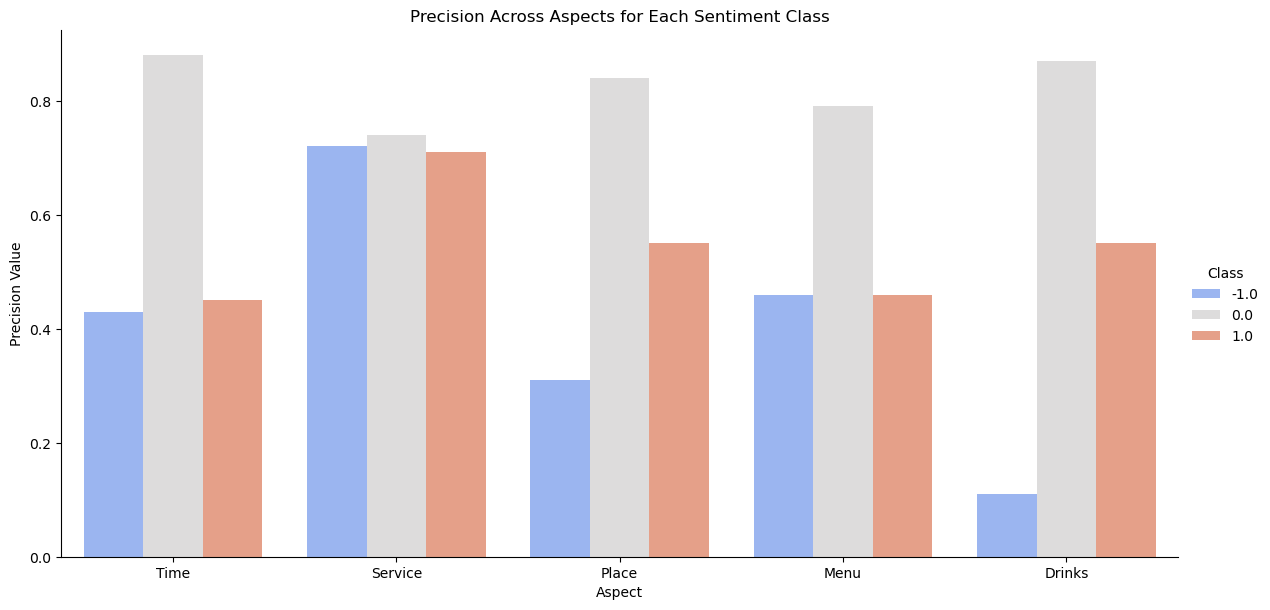

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrames
dataframes = [df_time, df_service, df_place, df_menu, df_drinks]
aspect_names = ['Time', 'Service', 'Place', 'Menu', 'Drinks']

# Prepare data for plotting
combined_df = pd.DataFrame()

for df, aspect in zip(dataframes, aspect_names):
    # Reshape the dataframe to long format
    temp_df = df.reset_index().melt(id_vars='Class', var_name='Metric', value_name='Value')
    temp_df['Aspect'] = aspect  # Add the aspect name
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Filtering for Precision Metric
precision_df = combined_df[combined_df['Metric'] == 'Precision']

# Plotting
g = sns.catplot(x='Aspect', y='Value', hue='Class', data=precision_df, kind='bar', palette='coolwarm', height=6, aspect=2)
g.set_axis_labels("Aspect", "Precision Value")
g.set_titles("Precision by Aspect and Sentiment Class")
plt.title('Precision Across Aspects for Each Sentiment Class')
plt.show()

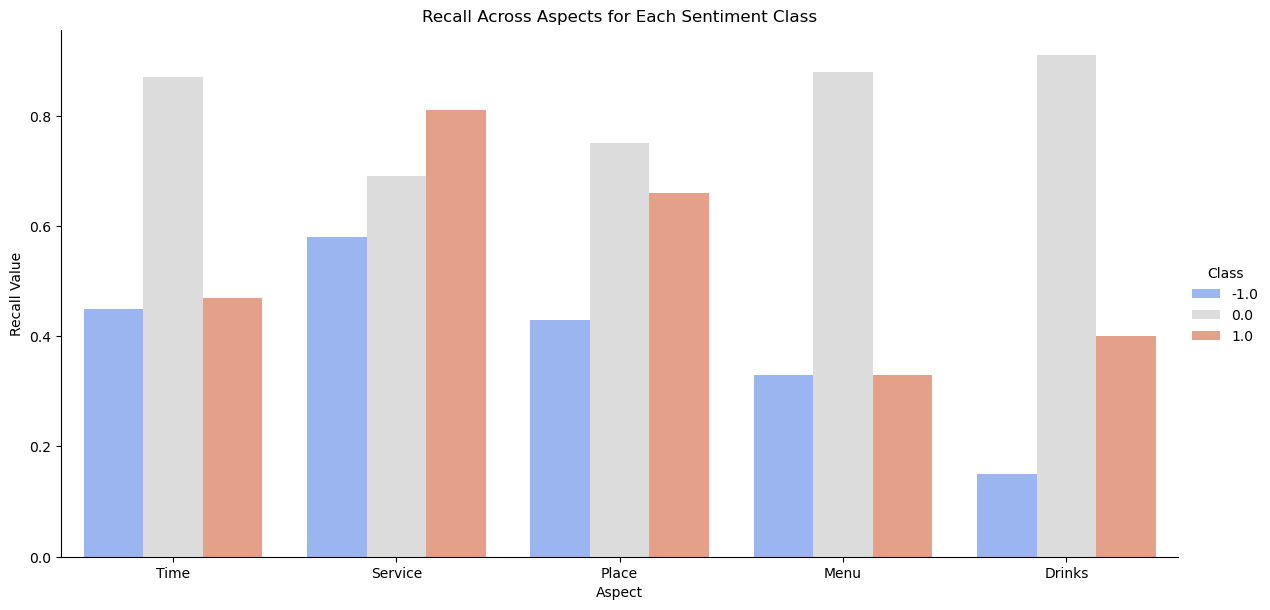

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrames
dataframes = [df_time, df_service, df_place, df_menu, df_drinks]
aspect_names = ['Time', 'Service', 'Place', 'Menu', 'Drinks']

# Prepare data for plotting
combined_df = pd.DataFrame()

for df, aspect in zip(dataframes, aspect_names):
    # Reshape the dataframe to long format
    temp_df = df.reset_index().melt(id_vars='Class', var_name='Metric', value_name='Value')
    temp_df['Aspect'] = aspect  # Add the aspect name
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Filtering for Recall Metric
recall_df = combined_df[combined_df['Metric'] == 'Recall']

# Plotting
g = sns.catplot(x='Aspect', y='Value', hue='Class', data=recall_df, kind='bar', palette='coolwarm', height=6, aspect=2)
g.set_axis_labels("Aspect", "Recall Value")
g.set_titles("Recall by Aspect and Sentiment Class")
plt.title('Recall Across Aspects for Each Sentiment Class')
plt.show()


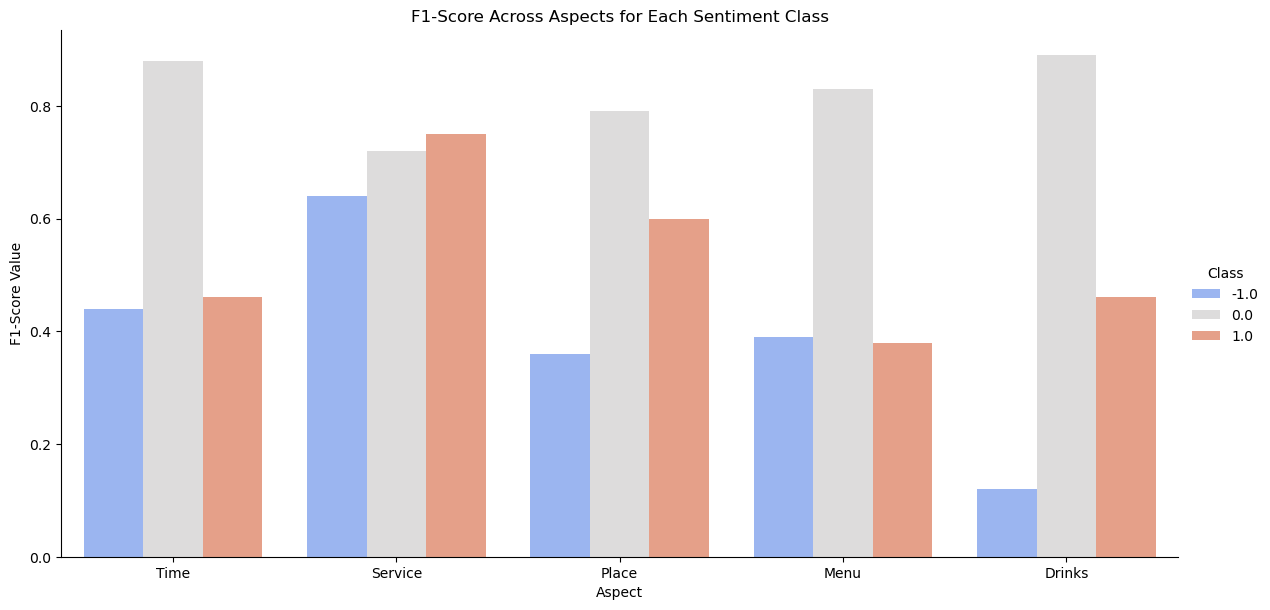

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrames
dataframes = [df_time, df_service, df_place, df_menu, df_drinks]
aspect_names = ['Time', 'Service', 'Place', 'Menu', 'Drinks']

# Prepare data for plotting
combined_df = pd.DataFrame()

for df, aspect in zip(dataframes, aspect_names):
    # Reshape the dataframe to long format
    temp_df = df.reset_index().melt(id_vars='Class', var_name='Metric', value_name='Value')
    temp_df['Aspect'] = aspect  # Add the aspect name
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Filtering for Recall Metric
recall_df = combined_df[combined_df['Metric'] == 'F1-Score']

# Plotting
g = sns.catplot(x='Aspect', y='Value', hue='Class', data=recall_df, kind='bar', palette='coolwarm', height=6, aspect=2)
g.set_axis_labels("Aspect", "F1-Score Value")
g.set_titles("F1-Score by Aspect and Sentiment Class")
plt.title('F1-Score Across Aspects for Each Sentiment Class')
plt.show()
